<a href="https://colab.research.google.com/github/saykim/keras_basic/blob/master/Keras_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# keras api

In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
#함수형 API

inputs = Input(shape=(28,28,1))
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(600, activation='relu')(x)
x = Dense(400, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [3]:
model = Model(inputs = inputs, outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 600)               471000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 752,510
Trainable params: 752,510
Non-trainable params: 0
_______________________________________________________

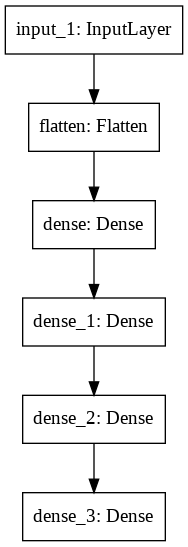

In [4]:
plot_model(model)

In [5]:
# concatenate 사용하기
input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)

#concat
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs = [input_layer], outputs=[output])

In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 28, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 28, 30)       3030        dense_4[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_2[0][0]                    
                                                                 dense_5[0][0]              

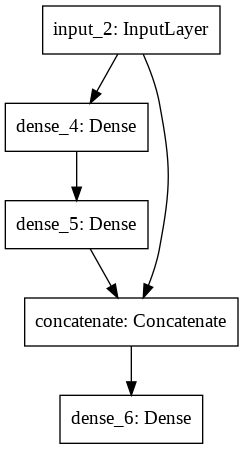

In [7]:
plot_model(model)

### 다중입력

In [25]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidedn1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10,activation='relu')(hidedn1)

concat = Concatenate()([input_1, hidden2])

output = Dense(1, activation='sigmoid', name='output')(concat)

In [26]:
model = Model(inputs=[input_1, input_2], outputs=[output])

In [27]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 10, 10)       1010        dense_17[0][0]                   
____________________________________________________________________________________________

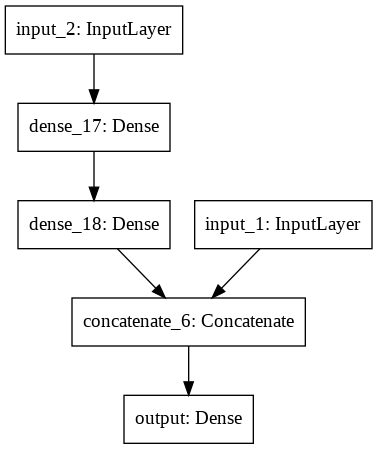

In [28]:
plot_model(model)

### 다중 출력

In [32]:
input_= Input(shape=(10,10), name='input_')
hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sub_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

In [33]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 10, 10)       1010        dense_25[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_26[0][0]                   
____________________________________________________________________________________________

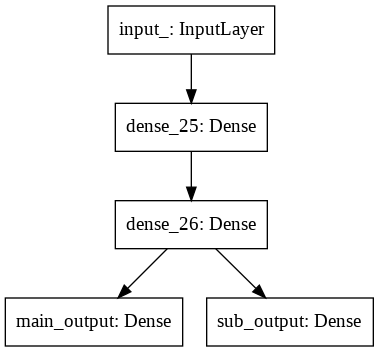

In [34]:
plot_model(model)

### 입력 / 출력 다중

In [38]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)

concat = Concatenate()([input_1, hidden2])

output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sub_output')(hidden2)

model = Model(inputs=[input_1, input_2], 
              outputs=[output, sub_out])

In [39]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 10, 10)       1010        dense_31[0][0]                   
____________________________________________________________________________________________

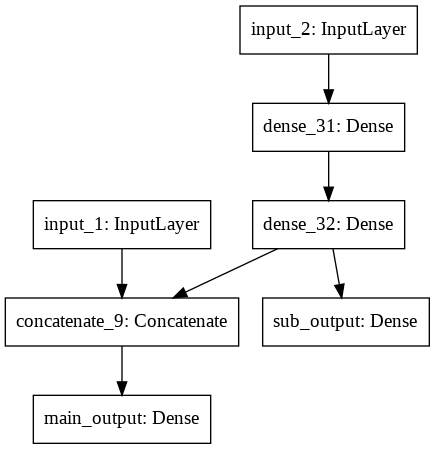

In [40]:
plot_model(model)

### 서브클래싱(Subclassing)

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [48]:
# Class로 모델만들기
class MyModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)

        self.dense_layer1 = Dense(300, activation=activation)
        self.dense_layer2 = Dense(100, activation=activation)
        self.dense_layer3 = Dense(units, activation=activation)

        self.output_layer = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense_layer1(inuts)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)
        return x

### 모델 가중치

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [52]:
inputs = Input(shape=(28,28,1))

x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [53]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_41 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_____________________________________________________

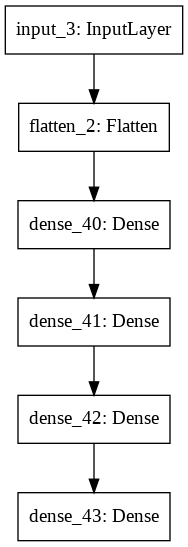

In [54]:
plot_model(model)

In [55]:
model.layers

In [56]:
hidden2 = model.layers[2]
hidden2.name

'dense_40'

In [57]:
model.get_layer('dense_40') is hidden2

True

In [58]:
weights, biases = hidden2.get_weights()

In [60]:
weights

array([[-0.06025226,  0.07273781,  0.07324812, ...,  0.04660435,
         0.05372393, -0.03648372],
       [ 0.04487911,  0.02205567, -0.02832507, ...,  0.04636323,
        -0.00185948,  0.03207233],
       [ 0.03499753, -0.01940731,  0.00170085, ..., -0.01032927,
        -0.03589007,  0.03929573],
       ...,
       [ 0.05392191,  0.02180985,  0.00228713, ..., -0.06074397,
        -0.06409909, -0.03429774],
       [ 0.0131454 , -0.03144849, -0.00198378, ..., -0.0011387 ,
        -0.00545595, -0.00719838],
       [ 0.01990321,  0.06097412, -0.00253846, ...,  0.0353053 ,
         0.04607842, -0.01263639]], dtype=float32)

In [61]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [62]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


# 실습

In [60]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')

### 데이터셋로드

In [2]:
tf.random.set_seed(111)

#학습데이터와 테스트 데이터를 load
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, x_val, y_train, y_val= train_test_split(x_train_full, y_train_full,
                                                   test_size=.3, random_state=42)

In [4]:
x_train.shape

(42000, 28, 28)

In [5]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])

print('num_x_train : ', num_x_train )
print('num_x_val : ', num_x_val)
print('num_x_test :', num_x_test)

num_x_train :  42000
num_x_val :  18000
num_x_test : 10000


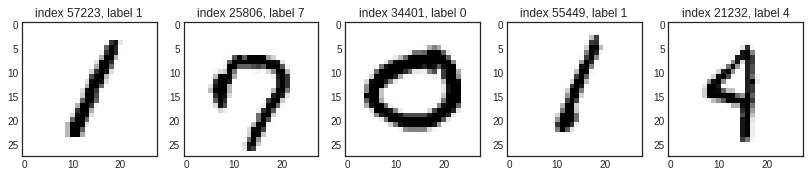

In [6]:
 # load data(이미지)그래프

 num_sample = 5

 random_idxs = np.random.randint(60000, size=num_sample)
 plt.figure(figsize=(14,8))

 for i, idx in enumerate(random_idxs):
     img = x_train_full[idx,:]
     label = y_train_full[idx]

     plt.subplot(1, len(random_idxs), i+1)
     plt.imshow(img)
     plt.title('index {}, label {}'.format(idx, label))



In [7]:
y_train[0]

7

### 데이터 전처리

In [8]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 모델링

In [63]:
inputs = Input(shape=(28,28))

x = Flatten(input_shape=(28,28))(inputs)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)


In [64]:
model = Model(inputs = inputs, outputs=x)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               1313

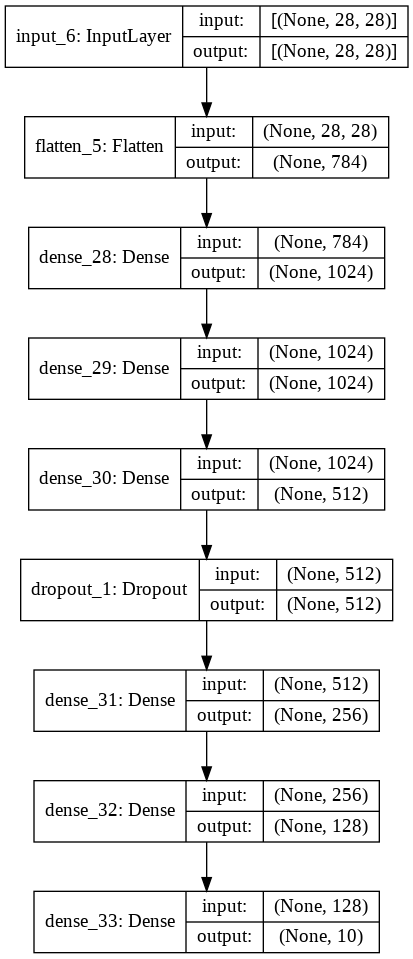

In [65]:
plot_model(model, show_shapes=True)

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [67]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_val, y_val))

Epoch 1/50
657/657 [==============================] - 4s 5ms/step - loss: 0.5059 - accuracy: 0.8360 - val_loss: 0.1335 - val_accuracy: 0.9621
Epoch 2/50
657/657 [==============================] - 3s 5ms/step - loss: 0.1207 - accuracy: 0.9654 - val_loss: 0.1435 - val_accuracy: 0.9648
Epoch 3/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0869 - accuracy: 0.9745 - val_loss: 0.0981 - val_accuracy: 0.9741
Epoch 4/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0675 - accuracy: 0.9811 - val_loss: 0.1140 - val_accuracy: 0.9725
Epoch 5/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0552 - accuracy: 0.9841 - val_loss: 0.1293 - val_accuracy: 0.9722
Epoch 6/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0446 - accuracy: 0.9881 - val_loss: 0.1082 - val_accuracy: 0.9752
Epoch 7/50
657/657 [==============================] - 3s 5ms/step - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.1071 - val_accuracy: 0.9766
Epoch 

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [68]:
df_result = pd.DataFrame(model.history.history)
df_result.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.279265,0.915238,0.133534,0.962111
1,0.117919,0.967048,0.143498,0.964778
2,0.087600,0.974952,0.098117,0.974056
3,0.068607,0.980714,0.113966,0.972500
4,0.055633,0.983810,0.129327,0.972222
5,0.048860,0.987190,0.108248,0.975222
6,0.042025,0.987571,0.107056,0.976556
7,0.038941,0.989524,0.099649,0.975944
8,0.033679,0.991095,0.143750,0.973500
9,0.033437,0.991095,0.145974,0.971611


### 결과 시각화

#### 간단히 바로 그래프를 보는 방법

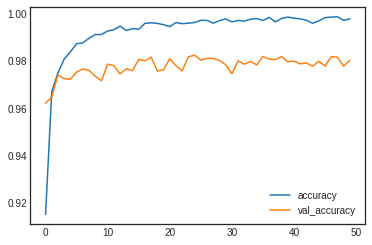

In [69]:
df_result[['accuracy','val_accuracy']].plot()

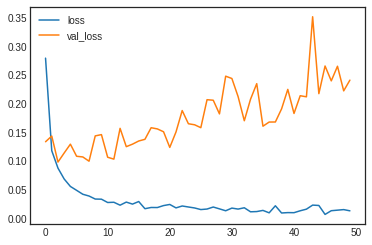

In [70]:
df_result[['loss','val_loss']].plot()

#### 그래프 그리는 표준

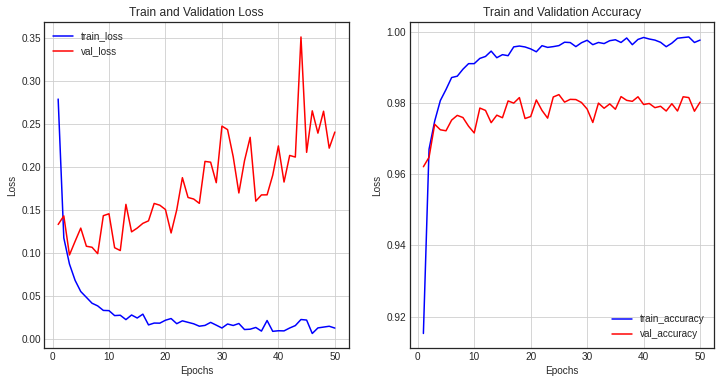

In [71]:
history_dict = history.history


loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()



accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()

### 모델 평가

In [72]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2081 - accuracy: 0.9809


[0.20808161795139313, 0.98089998960495]

In [80]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
print(pred_ys[1])

(10000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


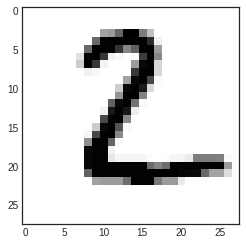

In [81]:
plt.imshow(x_test[1])

### 모델평가 (2)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


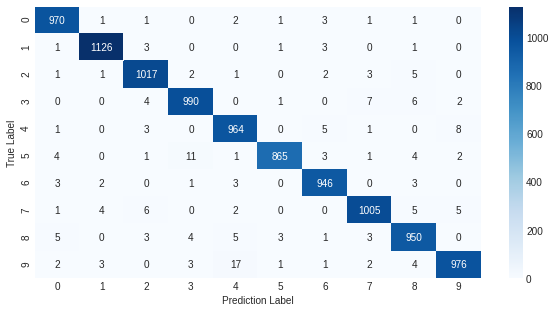

In [86]:
plt.figure(figsize=(10,5))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.show()

### 모델평가 (3)


In [87]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 모델저장과 복원